In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
import pandas as pd
import datetime as dt

In [73]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Table, text

In [ ]:
#create engine to hawaii.sqlite
engine = create_engine ("sqlite:///C://Users/edwar/Downloads/hawaii.sqlite")

In [75]:
#reflect an existing database into a new model
metadata = MetaData ()

station = Table ("station", metadata, autoload_with = engine)
[c.name for c in station.columns]
["id", "station", "name", "latitude", "longitude", "elevation"]

measurement = Table ("measurement", metadata, autoload_with = engine)
[c.name for c in measurement.columns]
["id", "station", "date", "prcp", "tobs"]

['id', 'station', 'date', 'prcp', 'tobs']

In [76]:
#reflect the tables
Base = automap_base ()
Base.prepare (autoload_with = engine)

In [77]:
#View all of the classes that automap found
for mapped_class in Base.classes:
    print (mapped_class)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [78]:
#Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [79]:
#Create our session (link) from Python to the DB
session = Session (engine)

In [80]:
#Find the most recent date in the data set
most_recent_date = session.query (func.max (Measurement.date)).scalar ()

In [81]:
#Design a query to retrieve the last 12 months of precipitation data.
#And plot the results. Starting from the most recent dtaa point in the database.
#Calculate the date one year from the last date in the dataset.
one_year_previous = dt.datetime.strptime (most_recent_date, "%Y-%m-%d") - dt.timedelta (days = 365)
one_year_previous_string = one_year_previous.strftime ("%Y-%m-%d")

In [82]:
#Perform a query to retrieve the date and precipitation scores
precipitation_data = session.query (Measurement.date, Measurement.prcp).filter (Measurement.date >= one_year_previous).all ()

In [83]:
#Save the query results as a Pandas DataFrame.  Explicitly set the column names
precipitation_df = pd.DataFrame (precipitation_data, columns = ["Date", "Precipitation"])

In [84]:
#Sort the dataframe by date
precipitation_df = precipitation_df.sort_values ("Date")

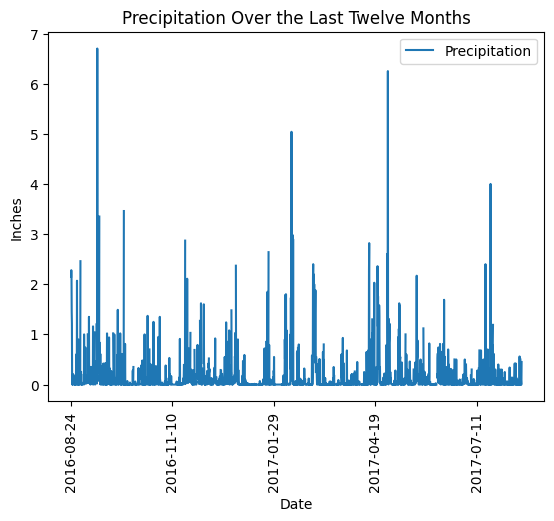

In [85]:
#Use Pandas plotting with MatPlotLib to plot the data
precipitation_df.plot (x = "Date", y = "Precipitation", 
title = "Precipitation Over the Last Twelve Months", rot = 90)
plt.xlabel ("Date")
plt.ylabel ("Inches")
plt.show ()

In [86]:
#Use Pandas to calculate the summary statistics for the precipitation data
#Calculate summary statistics for the precipiation data
summary_statistics = precipitation_df ["Precipitation"].describe ()

In [87]:
#Display the summary statistics as a dataframe
summary_statistics_df = pd.DataFrame (summary_statistics)
summary_statistics_df

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [88]:
#Design a query to calculate the total number of stations in the dataset
total_stations = session.query (func.count (Station.station)).all ()
total_stations

[(9,)]

In [89]:
#Design a query to find the most active stations (i.e, which stations have yhe most rows?)
#List the stations and their counts in descending order
active_stations = session.query (Measurement.station,
func.count (Measurement.station)).group_by (Measurement.station).order_by (func.count (Measurement.station).desc ()).all ()

In [90]:
#Disply the result
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [91]:
#Using the most active station id from the previous query,
#calculate the lowest, highest and average temperature
most_active_station = active_stations [0][0]

In [92]:
#Calculate the lowest, highest and average temperature for the most active station
temperature_statistics = session.query (func.min (Measurement.tobs).label ("Lowest Temperature"),
                                        func.max (Measurement.tobs).label ("Highest Temperature"),
                                        func.avg (Measurement.tobs).label ("Average Temperature")).filter (Measurement.station
                                        == most_active_station).all ()
temperature_statistics

[(54.0, 85.0, 71.66378066378067)]

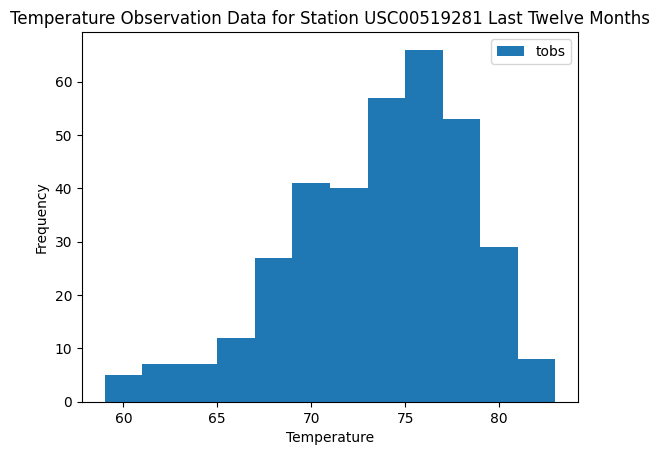

In [93]:
#Using the most active station id
#Query the last 12 months of temperature observation data for this station and
#plot the results as a histogram
temperature_data = session.query (Measurement.date, Measurement.tobs).filter (Measurement.station
== most_active_station, Measurement.date >= one_year_previous_string).all ()

temperature_df = pd.DataFrame (temperature_data, columns = ["Date", "Temperature"])

plt.hist (temperature_df ["Temperature"], bins = 12, label = "tobs")
plt.xlabel ("Temperature")
plt.ylabel ("Frequency")
plt.title (f"Temperature Observation Data for Station {most_active_station} Last Twelve Months")
plt.legend ()
plt.show ()

In [94]:
#Close session
session.close ()